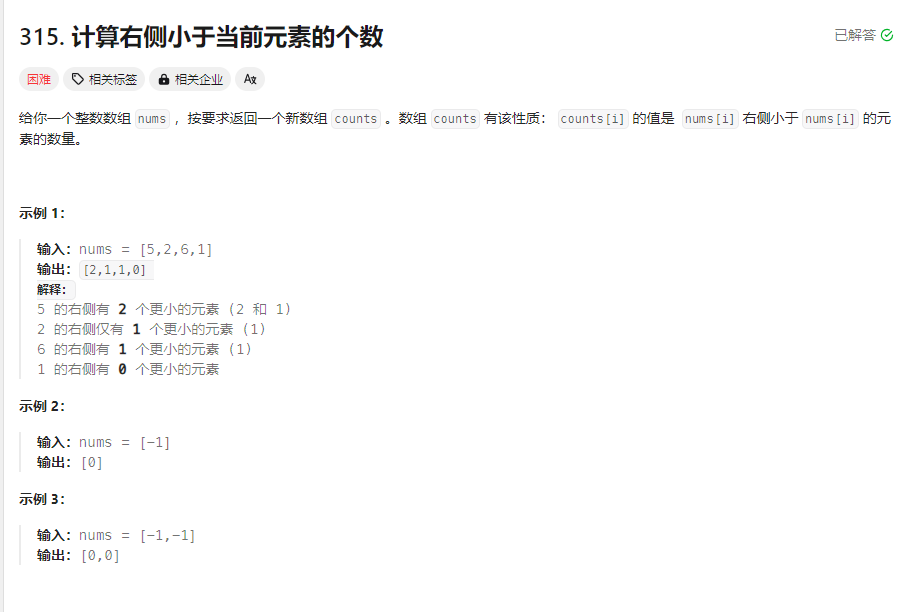

In [4]:
## 从头手搓
from typing import List

class Solution(object):
    def countSmaller(self, nums: List[int]) -> List[int]:
        size = len(nums)
        res = [0] * size # 最终的结果，通过二维数组的index来找到res对应的地方加上贡献 
        nums = [(nums[i], i) for i in range(size)]    # 二维数组        
        self.mershsort(nums, 0, size-1, res)
        return res
    

# mesh sort 's main function
    def mershsort(self, nums, low, high, res):
        if low >= high:   
            return nums
        
        mid = low + (high - low) // 2
        self.mershsort(nums, low, mid, res)
        self.mershsort(nums, mid + 1, high, res)
        return self.mersh(nums, low, mid, high, res) # 全局索引
    
    def mersh(self, nums, low, mid, high, res):
        temp = []         
        # 使用全局索引所以本行失效i, j, index = 0, 0, 0
        left = low 
        right = mid + 1
        while   left <= mid and right <= high:
            if nums[left][0] <= nums[right][0]:
                temp.append(nums[left])
                res[nums[left][1]] += right - mid - 1 # 对应的原来的index 为 nums[left][1]     i 会发生变换 
                left += 1  # 同时也要注意先赋值再加一
                            
            else:
                temp.append(nums[right])
                right += 1
        while left <= mid:
            temp.append(nums[left])
            res[nums[left][1]] += right - mid - 1
            left += 1
        while right <= high:
            temp.append(nums[right])
            right += 1            

        nums[low:high + 1] = temp
        return nums

array = [5,2,6,1]
a = Solution()
print(a.countSmaller(array))

[2, 1, 1, 0]
